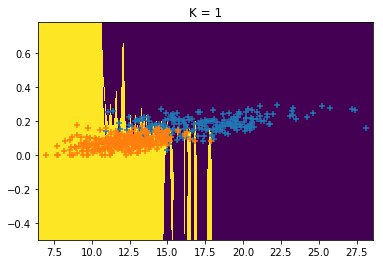

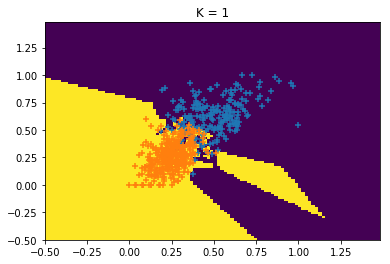

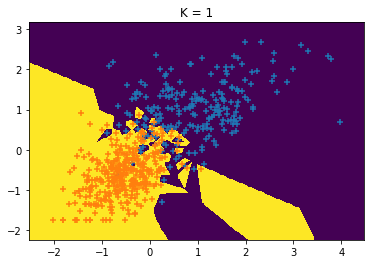

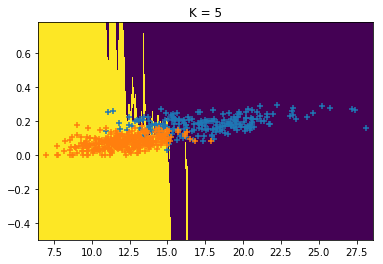

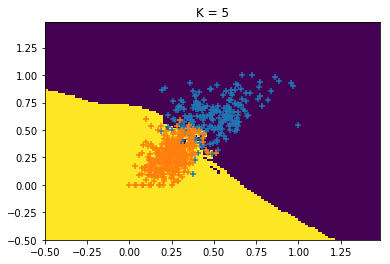

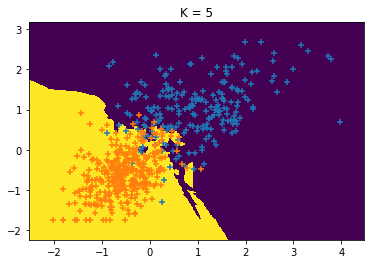

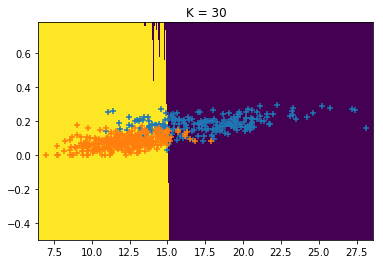

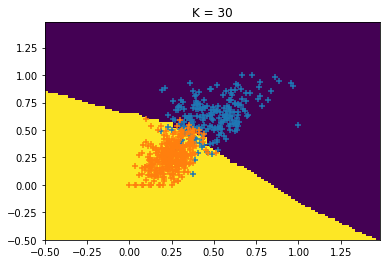

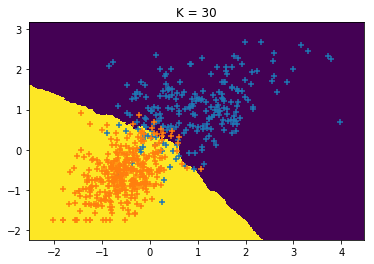

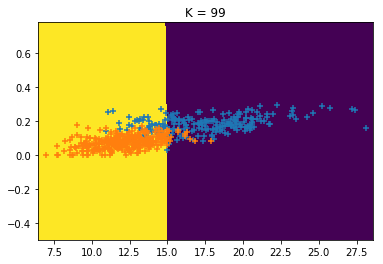

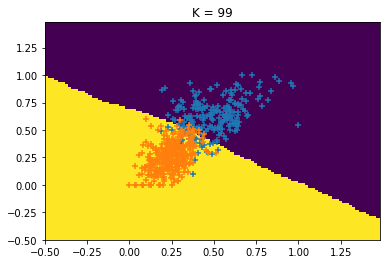

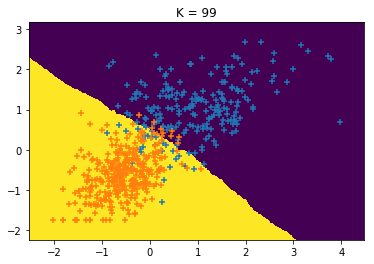

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('./data.csv')

data = df[['radius_mean', 'concave points_worst']]
target = df['diagnosis']

data = data.values
target = target.values
target = np.where(target == 'M', 0, 1)


def graph(data, target, n_neighbors):
    x_min, x_max = data[:,0].min() - 0.5, data[:,0].max() + 0.5
    y_min, y_max = data[:,1].min() - 0.5, data[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    kn = KNeighborsClassifier(n_neighbors=n_neighbors)

    kn.fit(data, target)

    z = kn.predict(np.c_[xx.ravel(), yy.ravel()])

    z = z.reshape(xx.shape)
        
    plt.pcolormesh(xx, yy, z)
    plt.scatter(data[:,0][target == 0], data[:,1][target == 0], marker='+')
    plt.scatter(data[:,0][target == 1], data[:,1][target == 1], marker='+')
    plt.title("K = %d" % i)
    plt.show()


data1 = MinMaxScaler()
data1 = data1.fit_transform(data)
data2 = StandardScaler()
data2 = data2.fit_transform(data)

# graph(data)

for i in [1,5,30,99]:
    graph(data, target, i)
    graph(data1, target, i)
    graph(data2, target, i)
    


# graph(data1)

# graph(data, target)
# graph(data1, target)
# graph(data2, target)

